# MultiDimensional Scaling (Machine Learning)
## Debayan Datta B2330027

In [4]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

# Read MNIST data

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)


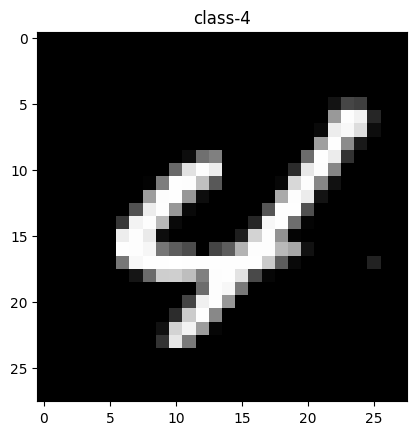

Train image 481-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  19  70  63   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 153 253 242  38   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   9 237 248 221  13   0   0]
 [  0   0   0   0   0   0   0   0   0

In [6]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = './data_images/'   # Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



## Only the Training data and Training labels are taken

In [7]:
# Flatten training dataset

x_train_flat = train_images.flatten().reshape(60000,28*28).astype(np.float64)

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
class_counts={class_no: 0 for class_no in range(10)}    # to find the class counts of each class that is has been sampled
print(class_counts,"\n")

# data being sampled
# Randomly select 600 samples for each class

selected_samples = []

for i in range(10):
    lbl_pos = np.where(train_labels == i)[0][:600]
    selected_samples.extend(lbl_pos)
    class_counts[i] = len(lbl_pos)
    print(class_counts)

print("\nclass_counts:", class_counts)
print("No. of samples selected:",len(selected_samples))

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0} 

{0: 600, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
{0: 600, 1: 600, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
{0: 600, 1: 600, 2: 600, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
{0: 600, 1: 600, 2: 600, 3: 600, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
{0: 600, 1: 600, 2: 600, 3: 600, 4: 600, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
{0: 600, 1: 600, 2: 600, 3: 600, 4: 600, 5: 600, 6: 0, 7: 0, 8: 0, 9: 0}
{0: 600, 1: 600, 2: 600, 3: 600, 4: 600, 5: 600, 6: 600, 7: 0, 8: 0, 9: 0}
{0: 600, 1: 600, 2: 600, 3: 600, 4: 600, 5: 600, 6: 600, 7: 600, 8: 0, 9: 0}
{0: 600, 1: 600, 2: 600, 3: 600, 4: 600, 5: 600, 6: 600, 7: 600, 8: 600, 9: 0}
{0: 600, 1: 600, 2: 600, 3: 600, 4: 600, 5: 600, 6: 600, 7: 600, 8: 600, 9: 600}

class_counts: {0: 600, 1: 600, 2: 600, 3: 600, 4: 600, 5: 600, 6: 600, 7: 600, 8: 600, 9: 600}
No. of samples selected: 6000


In [10]:
# Extract the selected samples
selected_images = x_train_flat[selected_samples]
selected_labels = train_labels[selected_samples]
print("selected_images.shape:",selected_images.shape)
print("selected_labels.shape:",selected_labels.shape)

selected_images.shape: (6000, 784)
selected_labels.shape: (6000,)


## Defining Euclidean distance and Multidimensional Scalling

In [11]:
def euclidean_dist_points(y1, y2):
    return np.sqrt(np.sum((y1 - y2)**2))

In [12]:
def compute_pairwise_distances(X):
    
    n_samples = X.shape[0]
    #print(n_samples)
    distances = np.zeros((n_samples, n_samples))  # Initialize an empty array for distances

    for i in range(n_samples):
        x1 = X[i]  # Get the current sample (x1)
        # Compute distances between x1 (selected_images[i]) and all other samples (x2)
        for j in range(n_samples):
            x2 = X[j]
            distances[i, j] = euclidean_dist_points(x1, x2)

    return distances


In [13]:
def centering_matrix(n):
    I = np.eye(n)  
    ones_matrix = np.ones((n, n))
    ones_over_n = ones_matrix / n
    # Subtract the scaled ones matrix from the identity matrix to create the centering matrix H
    H = I - ones_over_n
    
    return H

In [14]:
def mds(X, target_dimension):
    n_samples = X.shape[0]
    print(n_samples)
    
    # Compute pairwise distances
    D = compute_pairwise_distances(X)
    
    # Double centering
    H = centering_matrix(n_samples)
    H2 = -0.5 * np.dot(np.dot(H, D**2), H)  # B = -0.5 * H * D^2 * H 
    
    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(H2)
    
    # Sort eigenvalues and corresponding eigenvectors in descending order
    index = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[index]
    eigenvectors = eigenvectors[:, index]
    
    # Project data into lower dimension
    Proj_data = np.dot(eigenvectors[:, :target_dimension], np.diag(np.sqrt(np.maximum(eigenvalues[:target_dimension], 0))))
    
    return Proj_data


## implement MDS

In [15]:
projected_data = mds(selected_images, target_dimension=2)

6000


In [16]:
print("Projected data shape:", projected_data.shape)
print("Labels shape:", selected_images.shape)

Projected data shape: (6000, 2)
Labels shape: (6000, 784)


## Projectioning all the points wrt their class

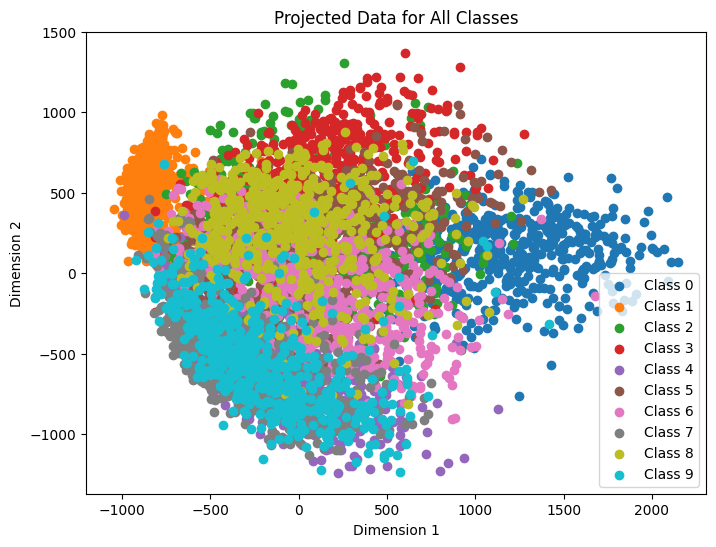

In [19]:
def plot_data_for_all_classes(proj_data, labels):
    plt.figure(figsize=(8, 6))
    colors = plt.cm.tab10(np.linspace(0, 1, 10))  # Generate colors for each class (up to 10 classes)

    for i in range(10):
        indices = np.where(labels == i)[0]
        #print(i, indices)
        plt.scatter(proj_data[indices, 0], proj_data[indices, 1], color=colors[i], label=f'Class {i}')

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Projected Data for All Classes')
    plt.legend()
    plt.show()

plot_data_for_all_classes(projected_data, selected_labels)